<a href="https://colab.research.google.com/github/JH-Y-324/first-repository/blob/master/Day02_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 1. 표본조사 체험하기


### 📘 문제

- 온라인 쇼핑몰은 전체 고객 수가 너무 많아, 모든 고객을 조사하기 어렵습니다.

- 그래서 무작위로 고객 30명을 뽑아 평균 만족도를 계산하고 이를 전체 만족도의 추정값으로 사용하려 합니다.

- 이번 실습에서는 직접 표본을 뽑고, 표본 평균을 구해보며,
  **“표본마다 결과가 달라질 수 있다”**는 추론 통계의 핵심 개념을 체험해봅니다.


### 📌 아래를 수행해 보세요:

- 표본을 무작위로 여러 번 뽑아 보고, 표본 평균이 어떻게 변하는지 확인해봅시다.

- 히스토그램을 그리고, 표본 평균의 분포 형태를 관찰해봅시다.


In [1]:
# 구글 코랩 환경에서 한글 폰트 설치 및 설정하기
# 아래 코드 실행 후, [런타임] - [세션 다시 시작] 필요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
# 파이썬 라이브러리 및 모듈 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'  # 기본 폰트 설정
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지

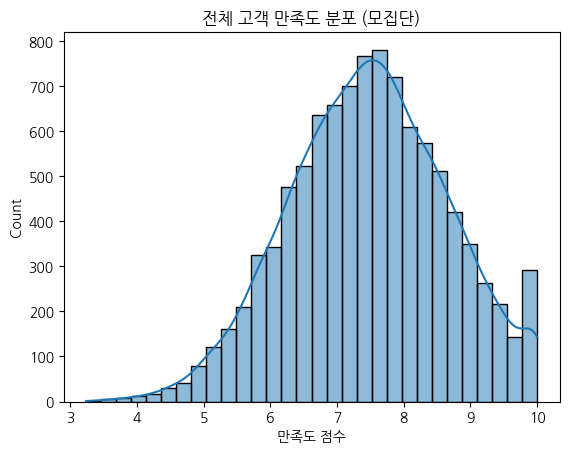

In [3]:
# 모집단 생성 (전체 고객 만족도 10,000명)
np.random.seed(2025)
population = np.random.normal(loc=7.5, scale=1.2, size=10000)
population = np.clip(population, 1, 10)  # 1점 ~ 10점 사이로 제한
df_pop = pd.DataFrame({'score': population})

# 전체 모집단 시각화
sns.histplot(df_pop['score'], bins=30, kde=True)
plt.title("전체 고객 만족도 분포 (모집단)")
plt.xlabel("만족도 점수")
plt.show()

In [4]:
# Q1. 모집단에서 무작위로 30명을 뽑아 표본 평균을 구해봅시다.

sample_30  = df_pop.sample(n=30, random_state=2025)
sample_mean = sample_30['score'].mean()
sample_mean

np.float64(7.404742229332289)

In [5]:
# Q2. 이 과정을 500번 반복하고, 표본 평균을 리스트에 저장합니다.

sample_means = []

for i in range(500):
  sample_30 = df_pop.sample(n=30)
  mean_30 = sample_30['score'].mean()
  sample_means.append(mean_30)

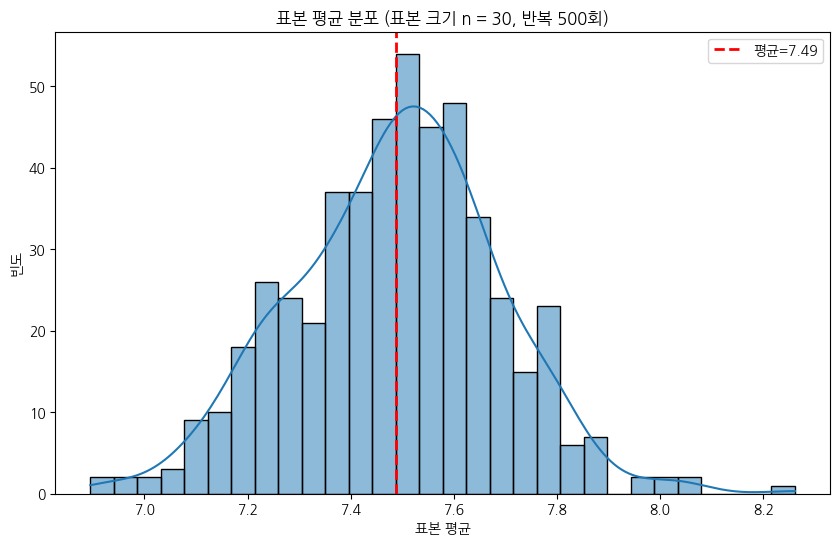

In [6]:
# Q3. 표본 평균들의 분포를 히스토그램으로 그려봅시다. 평균선도 함께 표시해 봅시다.

mean_of_sample_means = np.mean(sample_means)

plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=30, kde=True)

plt.axvline(x=mean_of_sample_means, color='red', linestyle='dashed', linewidth=2, label=f'평균={mean_of_sample_means:.2f}')

plt.title("표본 평균 분포 (표본 크기 n = 30, 반복 500회)")
plt.xlabel("표본 평균")
plt.ylabel("빈도")
plt.legend()
plt.show()

### 🧠 데이터를 어떻게 읽을까요?

- 표본 평균들은 어떤 값 주변에 많이 분포해 있나요? 이 값은 전체 모집단 평균과 얼마나 비슷한가요?

- 표본을 1번 뽑았을 때와 500번을 반복해서 뽑았을 때, 표본 평균의 분포나 신뢰성에는 어떤 차이가 있나요

- 친구가 다른 표본을 뽑았다면 같은 평균이 나왔을까요? 비슷한 결과가 나왔더라도 완전히 같지 않았다면, 그 이유는 무엇일까요?

- 표본 평균들의 분포는 어떤 모양인가요? 종 모양의 정규분포처럼 보이나요? 그렇다면 왜 그렇게 되는 걸까요?


1. 표본 평균들은 약 7.5점 주변에 가장 많이 분포해있다. 이는 전체 모집단 평균으로 설정한 값인 7.5와 매우 유사하다. 여러 번 표본을 추출하면 표본 평균은 모집단 평균 근처로 모이게 된다.
2. 표본을 한 번만 뽑았을 때의 표본 평균은 우연에 의해 모집단 평균과 차이가 날 수 있어서 신뢰성이 낮다. 반면에 표본을 500번 반복하여 추출하면 표본 평균들은 정규분포에 가까운 모양을 하고, 그 평균이 모집단 평균에 근접해서 신뢰성이 크게 증가한다. 즉, 반복 횟수(한 번이냐 500번이냐)가 많아질수록 표본 평균의 변동성은 줄어들고 추정의 정확도는 높아진다.
3. 친구가 다른 표본을 뽑았다면 완전히 같은 평균이 나오지 않았을 가능성이 크다. 표본이 무작위로 선택되기 때문에 각 표본에 포함되는 값이 서로 다르기 때문이다. 이러한 차이는 표본 오차(sampling error)에 의해 발생하며, 통계적으로 정상적인 현상이다.
4. 표본 평균들의 분포는 종 모양의 정규분포이다. 중심극한정리(central limit theorem) 때문이다. 모집단의 분포 형태와 관계없이 표본 크기가 충분히 크면 표본 평균의 분포는 정규분포에 가까워진다.

# 문제 2. 중심극한정리


### 📘 문제

- 현실에서는 모집단의 분포가 정규분포가 아닐 수도 있습니다.

- 예를 들어, 일부 고객은 매우 높은 점수를 주고, 대부분은 낮은 점수를 주는 만족도 분포가 있을 수 있죠. (예: 지수분포)

- 이처럼 원래 분포가 비정규분포여도,
  표본을 여러 번 뽑아 평균을 계산하면, 그 평균들의 분포는 정규분포에 가까워진다는 것을
  **중심극한정리(Central Limit Theorem)**라고 합니다.

- 이번 실습에서는 다양한 크기의 표본을 뽑아 평균을 계산하고,
  그 평균들의 분포가 어떻게 변하는지를 직접 실험해 봅니다.


### 📌 아래를 수행해 보세요:

- 비대칭적인 모집단(지수분포)에서 무작위로 표본을 추출해 평균을 구해봅시다.

- 표본 크기를 바꿔가며, 표본 평균들의 분포가 어떻게 변화하는지 확인해봅시다.

- 히스토그램을 그리고, 분포의 모양을 관찰해봅시다.

- 표본 크기가 커질수록 표본 평균 분포의 모양과 **퍼진 정도(분산)**가 어떻게 변하는지 관찰해봅시다.


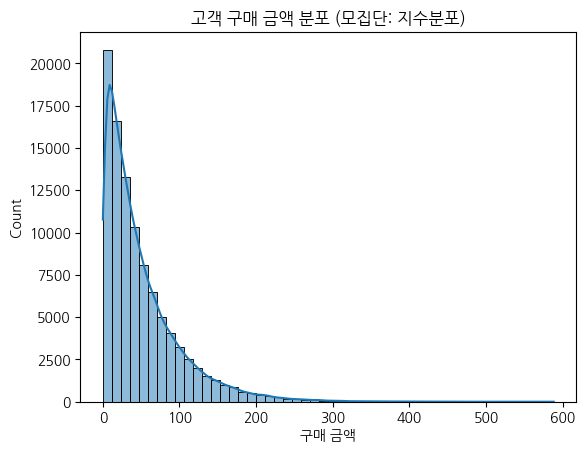

In [7]:
# 지수분포를 따르는 모집단 생성
np.random.seed(2025)
population = np.random.exponential(scale=50, size=100000)  # 평균 50, 비대칭 분포

# 모집단 시각화
sns.histplot(population, bins=50, kde=True)
plt.title("고객 구매 금액 분포 (모집단: 지수분포)")
plt.xlabel("구매 금액")
plt.show()

In [8]:
# Q1. 모집단에서 표본을 1000번 뽑고, 각 표본의 평균을 구해봅시다.
# 표본 크기 = 5일 때

sample_means_5 = []

for i in range(1000):
  sample_5 = np.random.choice(population, size=5, replace=False)
  mean_5 = sample_5.mean()
  sample_means_5.append(mean_5)

In [9]:
# Q2. 위 과정을 표본 크기 30, 100일 때도 반복해봅시다.
# sample_size = 30, 100

sample_means = {
    30: [],
    100: []
}

for sample_size in [30, 100]:
  for i in range(1000):
    sample = np.random.choice(population, size=sample_size, replace=False)
    mean_value = sample.mean()
    sample_means[sample_size].append(mean_value)

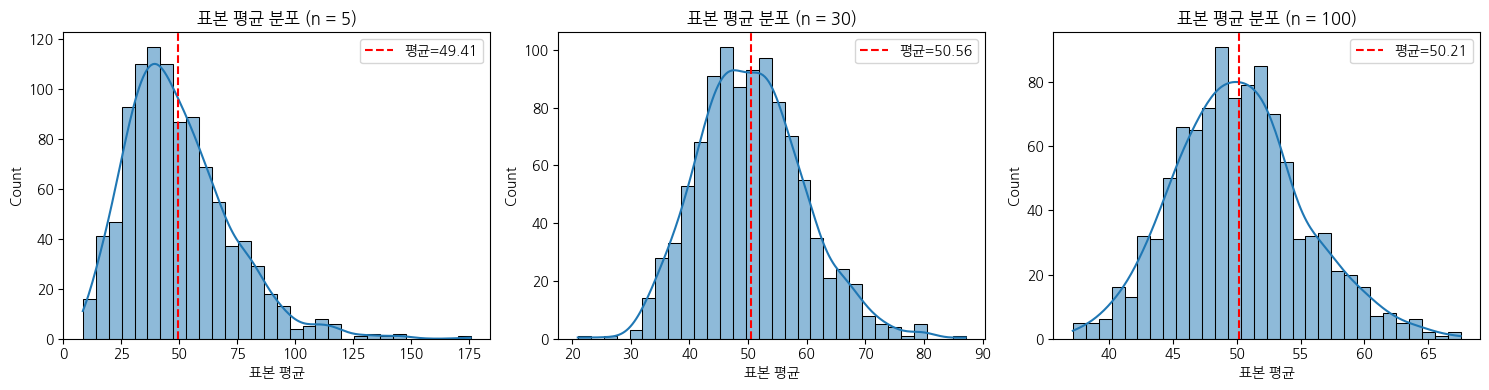

In [10]:
# Q3. 각 표본 크기별로 표본 평균들의 분포를 히스토그램으로 그려봅시다.
# 평균선을 함께 표시해 봅시다.

plt.figure(figsize=(15, 4))

# 표본 크기 5
plt.subplot(1, 3, 1)
sns.histplot(sample_means_5, bins=30, kde=True)
plt.axvline(np.mean(sample_means_5), color='red', linestyle='--',
            label=f'평균={np.mean(sample_means_5):.2f}')
plt.title("표본 평균 분포 (n = 5)")
plt.xlabel("표본 평균")
plt.legend()

# 표본 크기 30
plt.subplot(1, 3, 2)
sns.histplot(sample_means[30], bins=30, kde=True)
plt.axvline(np.mean(sample_means[30]), color='red', linestyle='--',
            label=f'평균={np.mean(sample_means[30]):.2f}')
plt.title("표본 평균 분포 (n = 30)")
plt.xlabel("표본 평균")
plt.legend()

# 표본 크기 100
plt.subplot(1, 3, 3)
sns.histplot(sample_means[100], bins=30, kde=True)
plt.axvline(np.mean(sample_means[100]), color='red', linestyle='--',
            label=f'평균={np.mean(sample_means[100]):.2f}')
plt.title("표본 평균 분포 (n = 100)")
plt.xlabel("표본 평균")
plt.legend()

plt.tight_layout()
plt.show()


### 🧠 데이터를 어떻게 읽을까요?

- 표본 크기가 작을 때 (예: 5), 평균들의 분포는 어떤 모양인가요?

- 표본 크기가 커질수록 평균 분포의 모양은 어떤 변화를 보이나요?

- 원래 모집단은 비대칭이었는데, 왜 평균들의 분포는 정규분포처럼 바뀌었을까요?

- 이 실험을 통해 중심극한정리를 어떻게 이해하게 되었나요?

- 표본 크기에 따라 **분포의 넓이(흩어짐)**는 어떻게 달라지나요?


1. 표본 평균들의 분포가 여전히 비대칭적인 형태를 띤다
2. 표본 크기가 증가함에 따라 표본 평균들의 분포는 점차 대칭적인 종 모양으로 변하며, 정규분포에 가까운 형태를 띠게 된다
3. 중심극한정리(central limit theorem) 때문이다. 모집단의 분포 형태와 관계없이 표본 크기가 충분히 크면 표본 평균들의 분포는 정규분포에 근사하게 된다.
4. 모집단이 정규분포가 아니더라도 표본 크기가 증가하면 표본 평균의 분포는 정규분포에 가까워진다는 중심극한정리의 개념을 시각적으로 확인해보았다.
5. 흩어짐이 감소하는 모습이 보인다. 표본 크기 n이 증가할수록 평균의 변동성은 감소하여 평균 추정의 신뢰성이 높아진다.


# 문제 3. 표준오차


### 📘 문제

- 앞선 실습에서 우리는 **표본 크기(n)가 커질수록 표본 평균들의 분포가 더 좁아진다**는 것을 확인했습니다.
- 이처럼 표본 평균들이 얼마나 흩어져 있는지(분포의 퍼진 정도)를 나타내는 값을 **표준오차(Standard Error, SE)**라고 부릅니다.
- 표준오차는 **표본 평균들의 표준편차**와 같은 의미이며, 이는 우리가 뽑은 표본 평균이 실제 모평균과 평균적으로 얼마나 떨어져 있을지를 나타내는 **'예상 오차의 크기'**입니다.

- 통계학적으로 이 표준오차는 **`SE = σ / √n`** (모집단 표준편차 / 표본 크기의 제곱근) 이라는 공식으로 계산할 수 있습니다.
- 이 공식은 **표본 크기(n)가 커질수록 표준오차(SE)가 작아진다**는 것을 명확히 보여줍니다.

- 이번 실습에서는 여러 크기의 표본을 뽑아, 시뮬레이션을 통해 얻은 **표본 평균들의 표준편차(실험값)**가 공식으로 계산한 **표준오차(이론값)**와 얼마나 일치하는지 직접 확인해봅니다.


### 📌 아래를 수행해 보세요:

- 모집단에서 여러 크기의 표본(10, 30, 100, 500)을 각각 1000번 뽑고, 그 평균들을 구한 뒤, **표본 평균들의 표준편차(=실험적 표준오차)**를 계산해봅시다.

- 이 결과를 이론적인 표준오차 공식과 비교하는 표를 만들고, 시각화해봅시다.

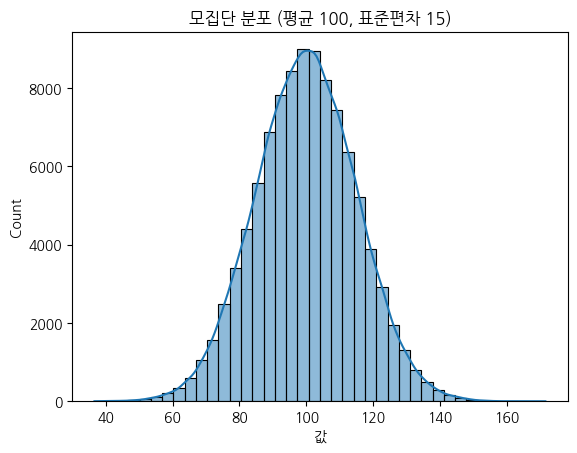

In [11]:
# 모집단 생성 (평균 100, 표준편차 15)
np.random.seed(2025)
population = np.random.normal(loc=100, scale=15, size=100000)

# 모집단 시각화
sns.histplot(population, bins=40, kde=True)
plt.title("모집단 분포 (평균 100, 표준편차 15)")
plt.xlabel("값")
plt.show()


In [12]:
# Q1. 표본 크기 10, 30, 100, 500에 대해 각각 1000번 표본을 뽑고, 평균을 구해봅시다.
# 각 표본 평균 분포의 표준편차를 계산해봅시다.
# 결과를 리스트에 저장하고, 표로 정리해봅시다.

sample_sizes = [10, 30, 100, 500]

results = []

for n in sample_sizes:
    sample_means = []

    for i in range(1000):
        sample = np.random.choice(population, size=n, replace=False)

        sample_means.append(sample.mean())

    std_of_means = np.std(sample_means, ddof=1)

    results.append([n, std_of_means])

df_results = pd.DataFrame(
    results,
    columns=["표본 크기 (n)", "표본 평균 분포의 표준편차"]
)

df_results


,표본 크기 (n),표본 평균 분포의 표준편차
0,10,4.659081
1,30,2.786076
2,100,1.526038
3,500,0.663386


In [25]:
# Q2. 이론적인 표준오차와 비교해봅시다.
# [공식] 표준오차(SE) = 모집단 표준편차 / √표본크기

population_std = 15

df_results['이론적 표준오차'] = population_std / np.sqrt(df_results['표본 크기 (n)'])

df_results['차이(실험 - 이론)'] = (
    df_results['표본 평균 분포의 표준편차'] - df_results['이론적 표준오차']
)

df_results

,표본 크기 (n),표본 평균 분포의 표준편차,이론적 표준오차,차이(실험 - 이론)
0,10,4.659081,4.743416,-0.084335
1,30,2.786076,2.738613,0.047463
2,100,1.526038,1.500000,0.026038
3,500,0.663386,0.670820,-0.007434


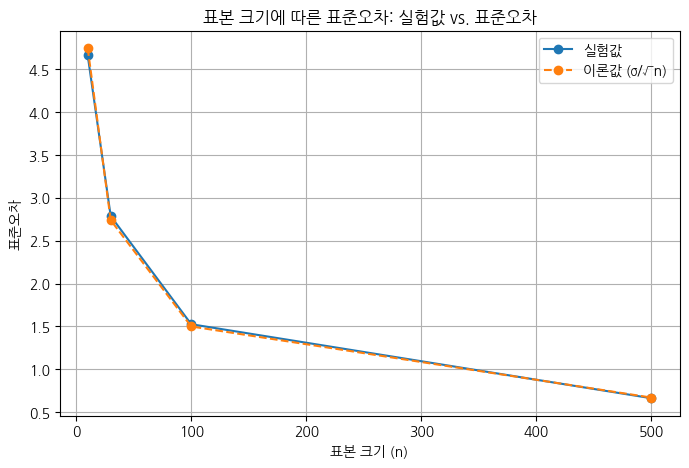

In [30]:
# Q3. 실험값과 이론값을 시각화해봅시다.
# 표본 크기를 x축, 표준오차를 y축으로 한 꺾은선 그래프를 그려봅시다.

plt.figure(figsize=(8, 5))

plt.plot(
    df_results['표본 크기 (n)'],
    df_results['표본 평균 분포의 표준편차'],
    marker='o',
    label='실험값'
)

plt.plot(
    df_results['표본 크기 (n)'],
    df_results['이론적 표준오차'],
    marker='o',
    linestyle='--',
    label='이론값 (σ/√n)'
)

plt.xlabel('표본 크기 (n)')
plt.ylabel('표준오차')
plt.title('표본 크기에 따른 표준오차: 실험값 vs. 표준오차')
plt.legend()
plt.grid(True)

plt.show()

### 🧠 데이터를 어떻게 읽을까요?

- 표본 크기가 작을수록, 표본 평균의 분포는 어떤 모양인가요? 넓게 퍼져 있나요?

- 표본 크기가 커질수록, 평균 분포는 어떻게 변하나요?

- 실험값과 이론값(공식 계산값)은 얼마나 비슷한가요?

- 왜 표본 크기가 커질수록 표준오차는 작아질까요?


1. 표본 크기가 작을수록 표본 평균의 분포는 넓게 퍼져 있으며 변동성이 크다. 개별 표본에 포함되는 관측값 수가 적어 극단값이나 우연한 변동의 영향을 크게 받기 때문이다. 따라서 표본 크기가 작은 경우 평균들의 분포는 상대적으로 불안정하다.
2. 표본 크기가 커질수록 표본 평균의 분포는 점점 더 좁아지고 중심값 주변으로 밀집하게 된다. 이는 평균 계산 시 개별 관측값들의 변동이 상쇄되면서 평균의 안정성이 증가하기 때문이다. 결과적으로 평균 분포는 더 집중되고 신뢰할 수 있는 형태를 보인다.
3. 실험을 통해 얻은 표본 평균 분포의 표준편차는 이론적으로 계산한 ~와 매우 유사한 값을 보였다. 표본 크기가 증가할수록 두 값의 차이는 더욱 감소하였으며, 이는 이론 공식이 실제 데이터에서도 잘 성립함을 의미한다.
4. 표본 평균의 표준오차는 모집단 표준편차를 표본 크기(n)의 제곱근으로 나눈 값으로 정의된다. 표본 크기가 커질수록 평균 계산에 사용되는 정보량이 증가하여 개별 관측값의 무작위 변동이 상쇄되기 때문이다. 그 결과 평균의 변동성은 감소하고, 평균 추정의 정확도는 향상된다.

# 문제 4. 신뢰구간 계산과 해석


### 📘 문제

- 표본 평균은 모집단 평균을 추정하는 좋은 점 추정(Point Estimation) 값이지만, 표본오차 때문에 정확히 일치하지는 않습니다.

- 그래서 우리는 "모집단 평균이 아마 이 범위 안에 있을 것이다"라고 **구간으로 추정(Interval Estimation)**하는 것이 더 합리적입니다. 이때 사용하는 개념이 바로 **신뢰구간(Confidence Interval)**입니다.

- 신뢰구간은 표본평균 ± 오차범위 형태로 계산되며, 이 오차범위는 신뢰수준(예: 95%, 99%)과 표본오차에 의해 결정됩니다.

- 이번 실습에서는 **모집단 표준편차(σ)를 알 때(z-분포)**와 **모를 때(t-분포)**의 신뢰구간을 각각 계산해보고, 신뢰수준에 따라 구간의 폭이 어떻게 변하는지 확인해봅니다.


### 📌 아래를 수행해 보세요:

- 모집단에서 30명을 무작위로 뽑아 평균, 표준편차, 표준오차를 계산해보세요.

- 95% 신뢰구간을 z-분포와 t-분포를 각각 사용해서 계산해보세요.

- 신뢰수준을 바꿨을 때(90%, 99%) 신뢰구간이 어떻게 변하는지 확인해보세요.


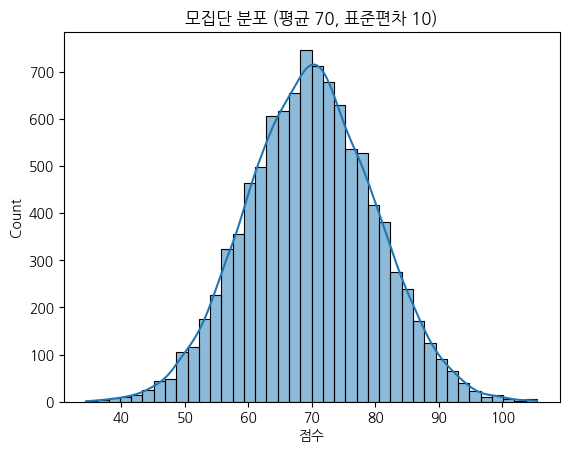

In [39]:
# 모집단 생성
np.random.seed(2025)
population = np.random.normal(loc=70, scale=10, size=10000)

# 모집단 시각화
sns.histplot(population, bins=40, kde=True)
plt.title("모집단 분포 (평균 70, 표준편차 10)")
plt.xlabel("점수")
plt.show()

In [40]:
# Q1. 모집단에서 표본 30명을 무작위로 추출하고, 표본 평균과 표준편차를 구해봅시다.
# 표준오차도 함께 계산해보세요.

sample_30 = np.random.choice(population, size=30, replace=False)

sample_mean=  np.mean(sample_30)

sample_std = np.std(sample_30, ddof=1)

standard_error = sample_std / np.sqrt(30)

sample_mean, sample_std, standard_error

(np.float64(67.6038534110437),
 np.float64(11.07803921383226),
 np.float64(2.022563990114242))

In [41]:
# Q2. 모집단의 표준편차를 알고 있다고 가정하고, z-분포를 사용하여 95% 신뢰구간을 계산해봅시다.

population_std = 10

n = 30

z = 1.96

standard_error = population_std / np.sqrt(n)

lower_bound = sample_mean - z * standard_error
upper_bound = sample_mean + z * standard_error

lower_bound, upper_bound

(np.float64(64.02539936867662), np.float64(71.18230745341079))

In [44]:
# Q3. 모집단의 표준편차를 모른다고 가정하고, 표본 표준편차와 t-분포를 사용하여 95% 신뢰구간을 계산해봅시다.

from scipy import stats

n = 30

df = n - 1

t_value = stats.t.ppf(0.975, df)

# 표본 표준오차 (표본 표준편차 사용)
standard_error_t = sample_std / np.sqrt(n)

# 95% 신뢰구간 계산
lower_bound_t = sample_mean - t_value * standard_error_t
upper_bound_t = sample_mean + t_value * standard_error_t

lower_bound_t, upper_bound_t


(np.float64(63.46724558535186), np.float64(71.74046123673554))

In [47]:
# Q4. 신뢰수준을 90%, 99%로 바꿔가며 신뢰구간을 계산해보고, 그 폭을 비교해봅시다.

n = 30
df = n - 1
mean = sample_mean
std = sample_std

confidence_levels = [0.90, 0.99]

results = []

for cl in confidence_levels:
    alpha = 1 - cl

    t_value = stats.t.ppf(1 - alpha/2, df)

    se = std / np.sqrt(n)

    lower = mean - t_value * se
    upper = mean + t_value * se

    width = upper - lower

    results.append([f"{int(cl*100)}%", lower, upper, width])

df_ci = pd.DataFrame(
    results,
    columns=["신뢰수준", "하한", "상한", "신뢰구간 폭"]
)

df_ci


,신뢰수준,하한,상한,신뢰구간 폭
0,90%,64.167260,71.040447,6.873186
1,99%,62.028887,73.178820,11.149934


### 🧠 데이터를 어떻게 읽을까요?

- z-분포와 t-분포를 사용한 신뢰구간은 얼마나 차이가 있나요?

- 신뢰수준이 높아질수록 신뢰구간의 폭은 어떻게 변하나요? 왜 그럴까요?

- 신뢰구간이 넓다는 건 좋은 걸까요? 나쁜 걸까요?

- 이 데이터가 실제 고객 만족도라면, 신뢰구간 정보를 마케팅 전략에 어떻게 활용할 수 있을까요?


1. z-분포와 t-분포를 사용한 신뢰구간은 형태는 같지만 폭에서 차이가 있다. t-분포를 사용한 신뢰구간이 z-분포 기반 신뢰구간보다 조금 더 넓게 나타나는데, 이는 모집단의 표준편차를 모르는 상황에서 표본 표준편차를 사용함으로써 발생하는 추가적인 불확실성을 반영하기 때문이다. 다만 표본 크기가 커질수록 두 분포의 차이는 점점 줄어들게 된다.
2. 신뢰수준이 높아질수록 신뢰구간의 폭은 더 넓어진다. 이는 더 높은 신뢰수준을 확보하기 위해 모집단 평균을 포함할 가능성이 높아지도록 범위를 더 크게 설정해야 하기 때문이다.
3. 신뢰구간이 넓다는 것은 모집단 평균을 포함할 가능성은 높지만, 동시에 추정의 정밀도는 낮다는 의미이다. 반대로 신뢰구간이 좁으면 추정은 정밀하지만, 모집단 평균을 놓칠 위험은 커진다. 따라서 신뢰구간의 좁음은 좋고 나쁨의 문제가 아니라, 안정성과 정확성 사이의 균형 문제로 이해해야 한다.
4. 고객 만족도의 신뢰구간은 단순한 평균값보다 의사결정에 더 신뢰할 수 있는 기준을 제공한다. 예를 들어 신뢰구간의 하한이 목표 만족도 기준 이상이라면, 마케팅 전략이나 서비스 품질이 안정적으로 유지되고 있다고 판단할 수 있다. 반대로 신뢰구간의 하한이 낮다면, 일부 고객군에서 불만족 가능성이 존재하므로 서비스 개선이나 타겟 마케팅 전략이 필요함을 시사한다. 즉, 신뢰구간은 평균 수치에 숨어 있는 불확실성을 고려한 전략 수립에 활용될 수 있다.

# 문제 5. 미니 프로젝트 - 고객 만족도 신뢰구간 추정


### 📘 문제

- 전체 고객 10,000명을 대상으로 만족도 조사를 하는 것은 시간과 비용이 많이 듭니다.
- 그래서 우리는 무작위로 일부 고객만 조사하여, 전체 고객의 평균 만족도를 추정하려 합니다.

- 이 프로젝트에서는 실제와 같은 상황을 가정하여, 표본을 뽑고 신뢰구간을 계산한 뒤, 이 결과를 바탕으로 마케팅 전략에 어떻게 활용할 수 있을지까지 생각해보는 실습을 진행합니다.


### 📌 아래를 수행해 보세요:

- 모집단을 생성하고, 거기서 표본을 40명 뽑아 평균을 계산해봅시다.

- 표본 평균과 표준편차를 바탕으로 95% 신뢰구간을 계산해봅시다.

- 히스토그램을 그리고 신뢰구간을 시각화해봅시다.

- 이 결과를 어떻게 해석하고, 마케팅 전략에 활용할 수 있을지 생각해봅시다.


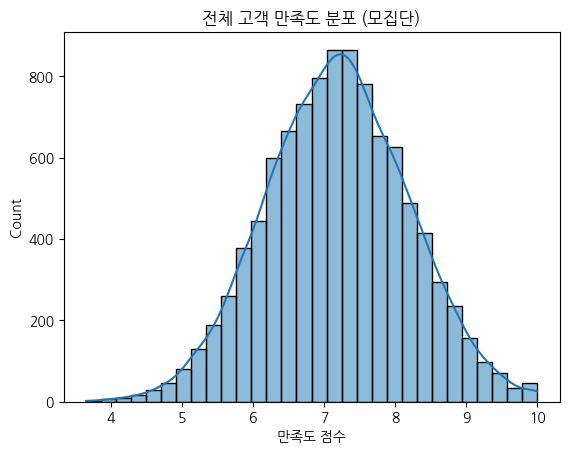

In [20]:
# 모집단 생성 (고객 만족도 10,000명)
np.random.seed(2025)
population = np.random.normal(loc=7.2, scale=1.0, size=10000)
population = np.clip(population, 1, 10)

# 모집단 시각화
sns.histplot(population, bins=30, kde=True)
plt.title("전체 고객 만족도 분포 (모집단)")
plt.xlabel("만족도 점수")
plt.show()

In [50]:
# Q1. 모집단에서 표본 40명을 무작위로 추출하고, 표본 평균과 표준편차를 구해봅시다.

np.random.seed(2025)
population = np.random.normal(loc=7.2, scale=1.0, size=10000)
population = np.clip(population, 1, 10)

sample_40 = np.random.choice(population, size=40, replace=False)
sample_mean_40 = np.mean(sample_40)
sample_std_40 = np.std(sample_40, ddof=1)

sample_mean_40, sample_std_40


(np.float64(7.144333064545942), np.float64(1.0987653116586593))

In [51]:
# Q2. 표준오차(SE)를 구하고, t-분포를 사용하여 95% 신뢰구간을 계산해봅시다.

n = 40
sample_mean = sample_mean_40
sample_std = sample_std_40

standard_error = sample_std / np.sqrt(n)

df = n - 1

t_value = stats.t.ppf(0.975, df)

lower_bound = sample_mean - t_value * standard_error
upper_bound = sample_mean + t_value * standard_error

standard_error, (lower_bound, upper_bound)

(np.float64(0.17373004994130625),
 (np.float64(6.792930869992129), np.float64(7.495735259099756)))

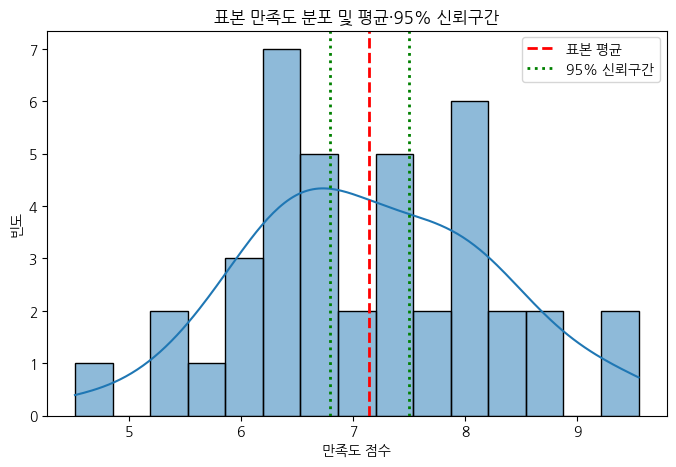

In [52]:
# Q3. 표본 데이터의 히스토그램을 그리고, 평균 및 신뢰구간을 함께 시각화해봅시다.

import matplotlib.pyplot as plt
import seaborn as sns

mean = sample_mean_40
ci_lower, ci_upper = lower_bound, upper_bound

plt.figure(figsize=(8, 5))

sns.histplot(sample_40, bins=15, kde=True)

plt.axvline(mean, color='red', linestyle='--', linewidth=2, label='표본 평균')

plt.axvline(ci_lower, color='green', linestyle=':', linewidth=2, label='95% 신뢰구간')
plt.axvline(ci_upper, color='green', linestyle=':', linewidth=2)

plt.title("표본 만족도 분포 및 평균·95% 신뢰구간")
plt.xlabel("만족도 점수")
plt.ylabel("빈도")
plt.legend()
plt.show()

In [24]:
# Q4. 신뢰구간의 결과에 따라 어떤 구체적인 마케팅 전략을 세울 수 있을까요?

- 전반적인 만족도를 유지하는 전략을 편다. (baseline 유지)    
95% 신뢰구간의 하한이 약 6.8점으로 나타났다는 것은 최소한의 경우를 고려하더라도 고객 만족도가 중립 이하로 떨어질 가능성은 낮다는 의미이다. 따라서 현재의 서비스 품질과 고객 경험은 기본적으로 유지 전략을 적용할 수 있는 수준으로 판단된다. 현재 만족도를 만든 주요 요소들을 보존한다.   
- 개선 여지가 있는 고객군 타깃 전략    
신뢰구간이 평균을 기준으로 약 +-0.35 정도의 폭을 가지므로, 일부 고객은 여전히 평균보다 낮은 만족도를 경험하고 있을 가능성이 있다. 이는 특정 고객 세그먼트에서 불만족 요인이 존재할 수 있음을 시사한다. 만족도 6점 이하 고객군을 대상으로 한 후속 설문을 실시하고, 불만족 원인을 파악한다.

### 🧠 데이터를 어떻게 읽을까요?

- 신뢰구간은 몇 점에서 몇 점 사이인가요?

- 이 구간은 전체 모집단 평균을 포함하고 있나요?

- 이 결과를 바탕으로 고객 만족도가 충분히 높다고 말할 수 있을까요?

- 만약 신뢰구간이 너무 넓게 나왔다면, 그 이유는 무엇이고 어떻게 개선할 수 있을까요?


1. 이번 분석에서 계산된 95% 신뢰구간은 약 6.79점에서 7.50점 사이이다.
2. 모집단의 실제 평균인 7.2점은 신뢰구간 안에 포함되어 있다. (이 방법으로 신뢰구간을 반복적으로 계산할 경우, 그중 약 95%의 구간이 모집단 평균을 포함하게 된다)
3. 충분히 높다고 말할 수 있다. 신뢰구간의 하한값이 약 6.8점으로 나타났다는 것은, 가장 보수적으로 보더라도 고객 만족도가 많이 낮게 떨어질 가능성은 낮다는 뜻이다. 따라서 전반적인 고객 만족도는 안정적이고 양호한 수준으로 해석할 수 있다.
4. 표본 크기가 작을 경우(평균 추정의 불확실성이 커짐), 표본 내 변동성(표준편차)이 큰 경우(고객 간 만족도 차이가 큰 경우), 높은 신뢰수준(예: 99%)을 사용하는 경우(더 안전한 추정을 위해 구간이 넓어짐) 신뢰구간이 넓게 나올 수 있다. 이를 개선하기 위해서는 표본 크기를 늘리거나(표준오차 감소, 신뢰구간 축소) 목적에 맞는 신뢰수준(보통 95%)을 선택하는 방법을 택할 수 있다.